## Five minutes With AI: Py-Feat


Today we will use a facial expression analysis tool called [Py-Feat](https://py-feat.org/pages/intro.html).

## Before we get started, let me introduce this experiment notebook.

This is a *jupyter notebook*. It is like a lab notebook, but has a programming feature.

A notebook is a list of *cells*. Each cell can be one of:
* code - in this case, python code
* markdown or text: your notes about what you are doing

To run a code cell, use Shift+Enter (hold down the Shift and Enter keys at once). 

If you'd like help with notebooks, we are here.

## Why do we like Py-Feat?

Here are some things we like about Py-Feat:
* It can be used to detect facial expressions from images and videos.
* It is free and easy to use.
* It is pretty fast (manual expression labeling can take hours for a 1 minute video).


You don't need to first become a computer scientist and figure out how to prepare your data or visualize the results, Py-Feat has those features already!



## Who can benefit from using Py-Feat?

According to the Py-Feat creators (whose backgrounds are in psychology and biomedical science), it was created with two primary audiences in mind:

* Human behavior researchers: Extract facial expressions from face images or videos with a simple line of code and analyze your data with Feat.
* Computer vision researchers: Develop & share latest models to a wide audience of users.

## What Aspects We Don't Like About Py-Feat?

* It can be slow for longer videos (you can select to sample video frames to speed it up, but you will need GPUs).

* Expressions you detect from Py-Feat can be used for emotion detection (but, what about cases where facial expressions does not reveal insights into an individual’s internal mental state?)

* The underlying models used for face, facial expression, and emotion detection in Py-Feat can be biased (often trained on actors' data, high-resolution well-lit images).

* The AI models working inside Py-Feat do not understand context, a common caveat in many AI models.

## So How Does Py-Feat Work?

Py-Feat has two main functions: facial feature detection and visualization. 
* It first detects faces from image or video frames using a type of AI model called Convolutional Neural Networks.
* After a face is detected, it identifies 68 facial landmarks (like co-ordinates of locations on a map).
* It then uses these landmarks to detect specific facial muscles which can be called **Facial Action Units**.
* Action units and landmarks can then be used to detect and classify emotion as well.

## Okay, Let's see how to use it?

### **Important**

To be able to edit this notebook and play around with it, you need to create a copy of it into your own drive.

You can do it by: 
1. Click on `File` in the top menu.
2. Select `Save a copy in Drive`.




## First we install Py-Feat and other libraries

In [ ]:
#!pip install git+https://github.com/cosanlab/py-feat.git
!pip install -q py-feat

### To visualize we need a visualization library called matplotlib

In [ ]:
!pip install matplotlib==3.5.0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### To download a youtube video, we will use `yt-dlp` library.

In [ ]:
!pip install yt-dlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We may need to restart the notebook for the installation to work properly. We can do it by clicking on **Runtime** in the top menu, and click **Restart Runtime**.

## Second, we will use Py-Feat to do facial expression analysis on a video




### We will use a sample video from a facial expression dataset available [here](https://osf.io/6tbwj/). 

You can download one of the video files from (Files-> recordings -> then choose S1, S2 or S3). We are using the video `006.mp4`.

In [ ]:
video = './drive/MyDrive/Colab Notebooks/006.mp4'

For our notebook to get access to our drive, let's run this:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Let's look at the video first

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./drive/MyDrive/Colab Notebooks/006.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(""" <video width=400 controls> <source src="%s" type="video/mp4"></video>
""" % data_url)

## Let's use Py-Feat to analyze the video

In [ ]:
from feat import Detector

# Initialize the default detector
detector = Detector()


# let's do detection
facial_exp = detector.detect_video(video)

100%|██████████| 36/36 [02:37<00:00,  4.39s/it]


In [ ]:
# looking at the first 10 rows of these predictions 
facial_exp.head(10)

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
frame,,,,,,,,,,,,,,,,,,,,,
0,191.254803,218.343227,190.111628,256.999815,0.999702,188.350974,191.722583,197.013625,204.127803,215.626034,...,0.029897,0.009071,0.005045,0.018144,0.001185,0.138703,0.099490,0.728363,./drive/MyDrive/Colab Notebooks/006.mp4,0
1,190.431880,219.633367,190.916973,256.674432,0.999690,187.377077,191.238169,196.824357,204.069863,215.605244,...,0.101084,0.011691,0.010088,0.030851,0.001798,0.155741,0.250652,0.539178,./drive/MyDrive/Colab Notebooks/006.mp4,1
2,189.976308,221.117871,190.672339,259.367055,0.999699,185.352946,189.623626,195.791148,203.780516,216.178035,...,0.051979,0.002727,0.005327,0.165825,0.001038,0.334964,0.389091,0.101029,./drive/MyDrive/Colab Notebooks/006.mp4,2
3,189.388853,219.912561,192.493684,257.480687,0.999688,185.349137,189.763667,196.215848,204.453988,216.635584,...,0.026026,0.031847,0.024410,0.053039,0.000592,0.396848,0.108550,0.384713,./drive/MyDrive/Colab Notebooks/006.mp4,3
4,189.324881,220.391078,192.872649,257.197726,0.999663,184.988697,189.486557,196.074030,204.430594,216.858207,...,0.029051,0.035070,0.012380,0.068008,0.000561,0.284539,0.125012,0.474431,./drive/MyDrive/Colab Notebooks/006.mp4,4
5,189.291091,221.685095,191.424071,259.242800,0.999700,185.227530,189.654925,196.044347,204.493293,217.456506,...,0.067496,0.011321,0.002275,0.058694,0.000495,0.240814,0.486596,0.199805,./drive/MyDrive/Colab Notebooks/006.mp4,5
6,189.057710,221.128779,191.308275,257.511543,0.999686,184.797190,189.473011,196.077791,204.965435,218.567326,...,0.068207,0.003210,0.006735,0.155823,0.000819,0.420742,0.212390,0.200281,./drive/MyDrive/Colab Notebooks/006.mp4,6
7,190.036701,220.037570,190.500732,256.050283,0.999709,183.774300,188.674039,195.374364,204.273967,217.829079,...,0.077420,0.001968,0.013998,0.062169,0.002977,0.373317,0.125483,0.420088,./drive/MyDrive/Colab Notebooks/006.mp4,7
8,189.764507,219.362680,188.733801,254.477056,0.999690,182.232539,187.768347,194.860084,204.214965,218.407153,...,0.086473,0.002472,0.013223,0.036313,0.013185,0.157069,0.154333,0.623406,./drive/MyDrive/Colab Notebooks/006.mp4,8


### In the table above Py-Feat provides a report on the facial expression analysis which includes:
1. the position of the detected face in each video frames
2. the co-ordinates of detected facial landmarks 
3. the detected action units (nose wrinkles, jaw drops, etc.)


### let's look at the expressions at specific moments of the video

[<Figure size 1080x504 with 3 Axes>,
 <Figure size 1080x504 with 3 Axes>,
 <Figure size 1080x504 with 3 Axes>,
 <Figure size 1080x504 with 3 Axes>]

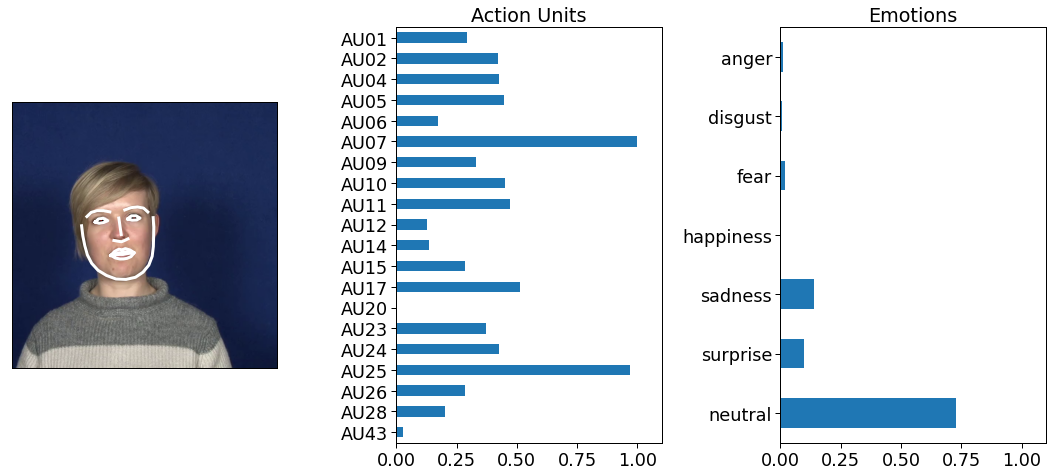

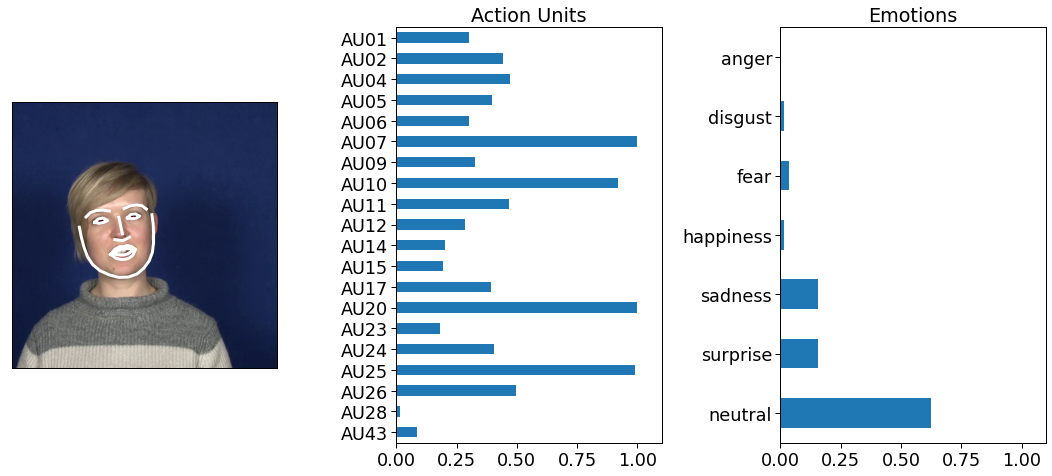

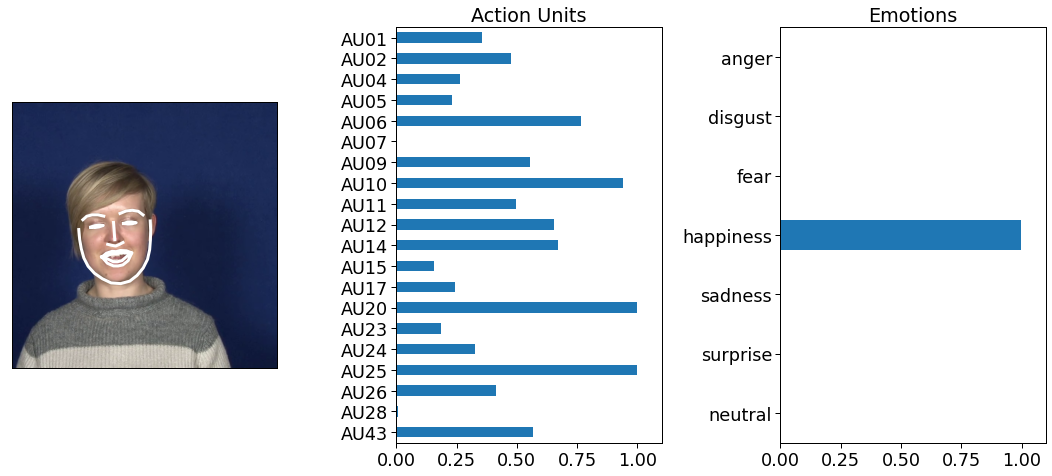

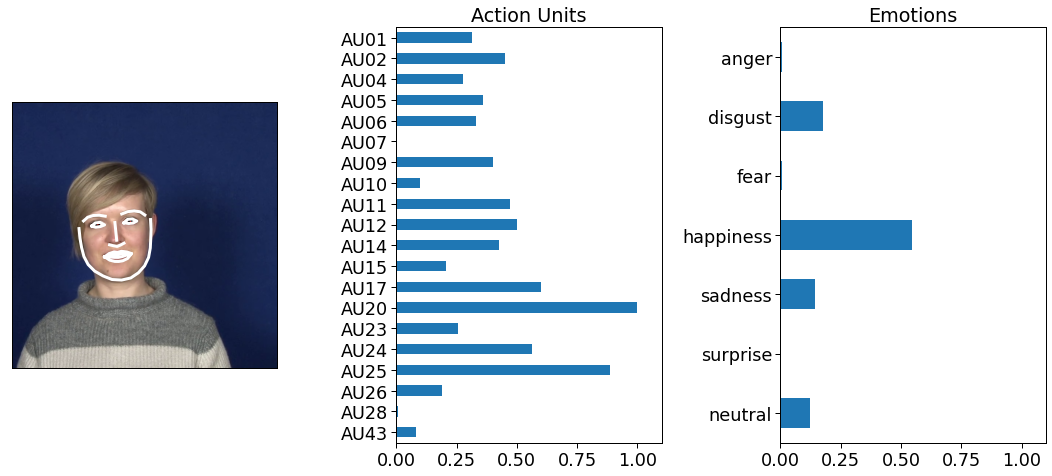

In [ ]:
 facial_exp.loc[[0, 8, 24, 35]].plot_detections(faceboxes=False, add_titles=False)

### We can also look at the transition in facial expression. Here, it suggests the person was happy at the end of the video

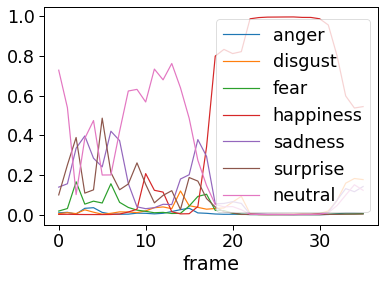

In [ ]:
axes = facial_exp.emotions.plot()

## How about using a Youtube video to analyze?

### As an example, we will use Actress Emma Watson's speech at the UN on Gender Equality 

We will use the video available [here](https://www.youtube.com/watch?v=dbEfDv9XSlE)

**Downloading youtube video**

To downalod a Youtube video, we can use `yt-dlp` library that we installed before.


In [ ]:
!yt-dlp https://www.youtube.com/watch?v=dbEfDv9XSlE

[youtube] Extracting URL: https://www.youtube.com/watch?v=dbEfDv9XSlE
[youtube] dbEfDv9XSlE: Downloading webpage
[youtube] dbEfDv9XSlE: Downloading android player API JSON
[info] dbEfDv9XSlE: Downloading 1 format(s): 248+251
[download] Emma Watson's UN Speech - SHORT BUT EPIC VERSION - Inception Theme [dbEfDv9XSlE].webm has already been downloaded


Once downloaded, we can view the file by:
1. Click on the folder symbol on the left menu.
2. We should be able to view the video there, but once we close the sesion, the file will be deleted as it is specific to this session.
3. We can avoid that by downloading (right click on the file) and uploading it to our drive.
4. If we run into issue accessing the video file on the drive, we can connect our drive to the notebook using the following code:

100%|██████████| 33/33 [02:42<00:00,  4.93s/it]


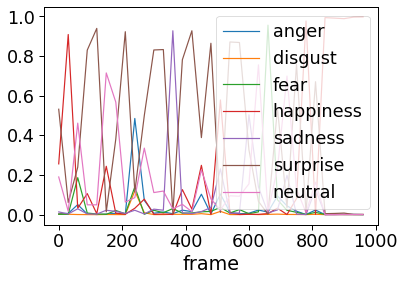

In [ ]:
# loading the clip to this notebook from the drive folder
emma_speech = './drive/MyDrive/Colab Notebooks/Emma-UN-Speech.mp4'

# Run detection using Py-Feat
facial_exp_emma = detector.detect_video(emma_speech, skip_frames= 30)
axes = facial_exp_emma.emotions.plot()

## Let's look at the expression of the actress at Frame 900, where she refers to herself as the 'Harry Potter' girl with a smile


[<Figure size 1080x504 with 3 Axes>]

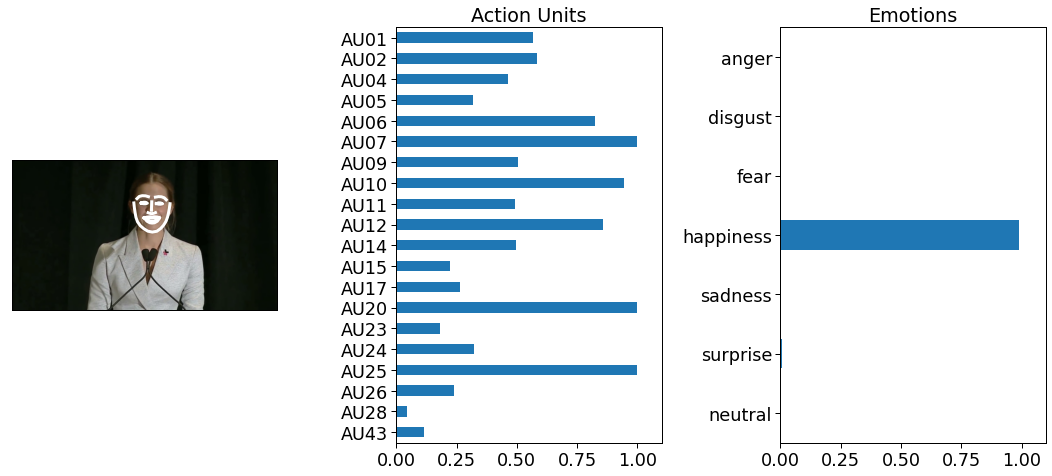

In [ ]:
facial_exp_emma.loc[[900]].plot_detections(faceboxes=False, add_titles=False)

### How are we using Py-Feat?

We are using Py-Feat to identify facial expression in people's faces and explore how to use them for:
* deception detection
* alignment during a conversation
* understanding non-verbal cues when interacting with neuro-divergent children.

## I am curious to know more!

If you like Py-Feat, we have other great resources coming up.
* If you have audio, we can introduce you to [Whisper](https://colab.research.google.com/drive/1yAHySBUs6W5GRrJfg4IrSrDn-tAeMCE1?usp=sharing) to get the transcript.
* If you have *full body video*, we can introduce you to pose detection and person tracking with [OpenPose](https://colab.research.google.com/drive/1PB6sa3PFwT2ag7_7n7KaaUdf7Fj2HxBy?usp=sharing).
* For the *audio*, we can add extraction of acoustic/prosodic features.
* Once you have a *transcript*, we can add NLP to identify sentiment, named entities, and more.

## End Note
If you use Py-Feat, please let us know. We want to work with you! We want to know what works and what doesn't! We want to understand your joys and your concerns.